In [5]:
%matplotlib inline
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import re
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib
from sklearn import svm  
from sklearn import tree
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler

## Test Images

In [94]:
def print_img(path, img_list=None):
    plt.figure(figsize=(10, 10))
    if img_list == None:
        img_list = os.listdir(path)
    if '.DS_Store' in img_list:
        img_list.remove('.DS_Store')
    rows = len(img_list)//6+1
    for idx in range(len(img_list)):
        plt.subplot(rows, 6, idx+1)
        img = cv2.imread(path+img_list[idx]);
        plt.axis("off")
        plt.title(img_list[idx])
        plt.imshow(img)

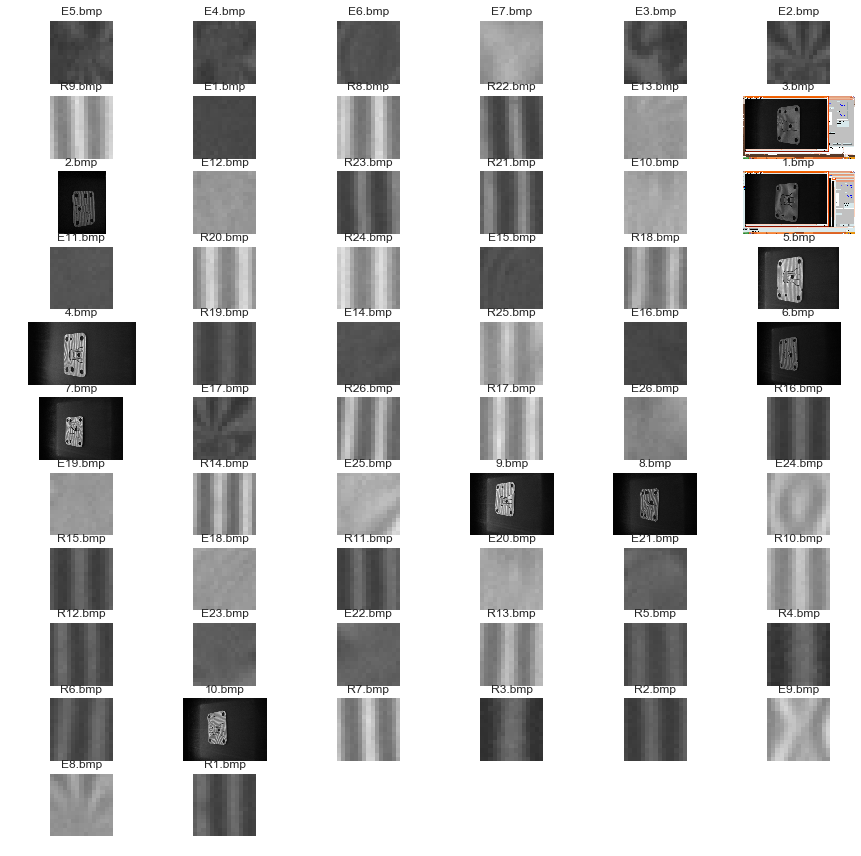

In [42]:
print_img("../img/GLCM_SVM/")

## 从GLCM_result.csv读取数据

In [96]:
GLCM_param = pd.read_csv("../GLCM_result.csv")
pattern = re.compile(r'\w*/\w*')
GLCM_param["Picture"] = [pattern.findall(p)[-1][1:] for p in GLCM_param["Picture"]]

### 部分数据展示

In [61]:
GLCM_param

,Picture,Angle,Entropy,Homogeneity,Contrast,ASM,Correlation
0,E30,0,-0.285911,0.698571,0.785714,0.155397,0.024290
1,E30,90,-0.278635,0.700952,0.838095,0.153492,0.023571
2,E30,45,-0.318043,0.682653,0.928571,0.148831,0.015382
3,E30,135,-0.323708,0.689796,0.938776,0.153348,0.014754
4,E31,0,-0.315176,0.769048,0.461905,0.251553,0.002177
5,E31,90,-0.293739,0.778571,0.442857,0.253277,0.003251
6,E31,45,-0.272780,0.788265,0.423469,0.255870,0.004403
7,E31,135,-0.329813,0.762755,0.474490,0.250664,0.001450
8,E33,0,-0.331820,0.761905,0.476190,0.258231,0.000990
9,E33,90,-0.299019,0.776190,0.447619,0.259274,0.002820


## 用不同的参数为y轴对每个图像画出折线

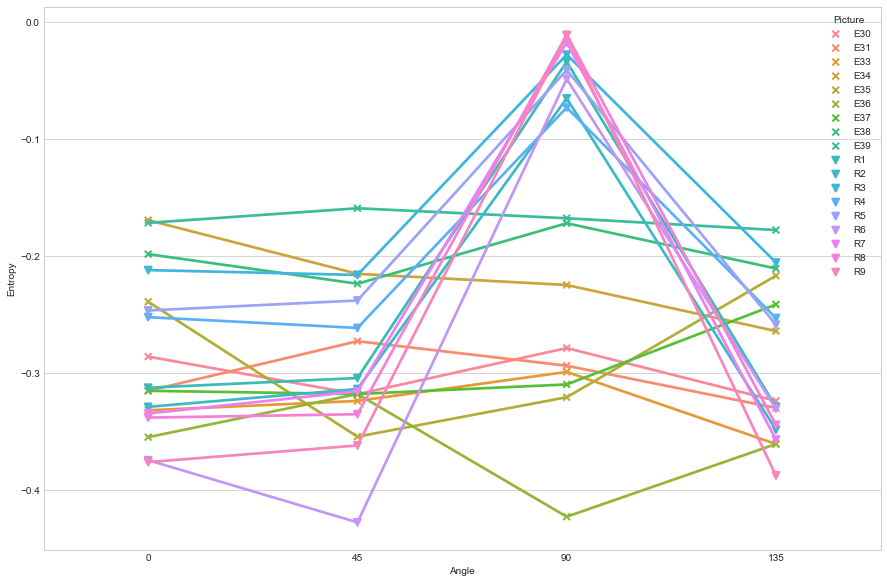

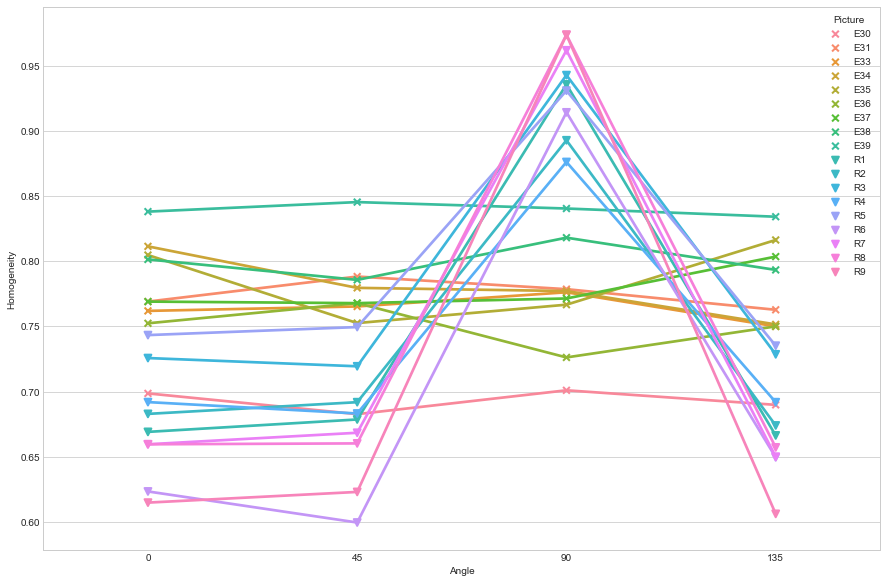

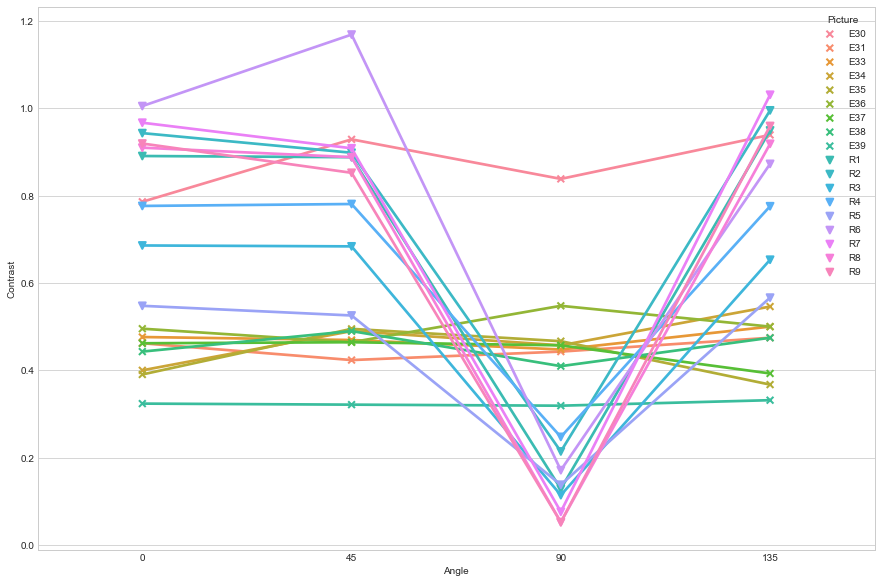

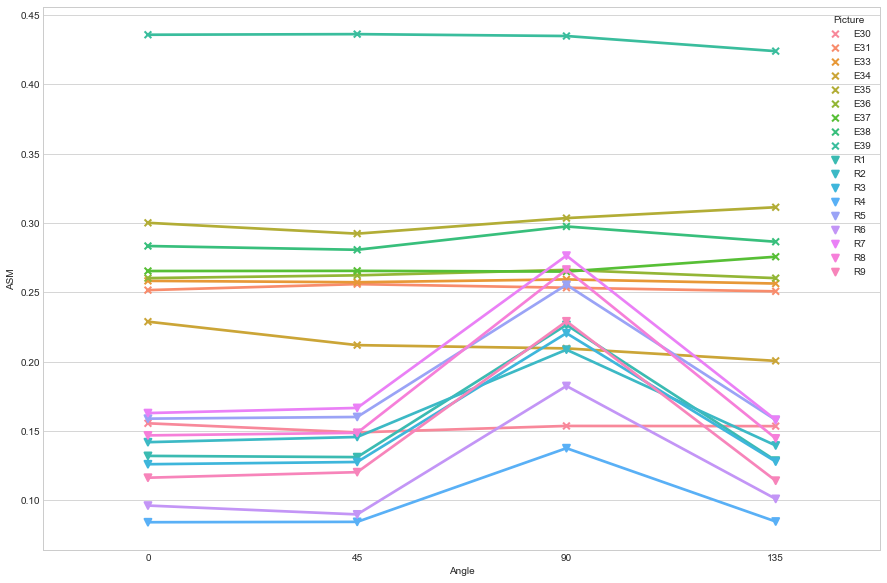

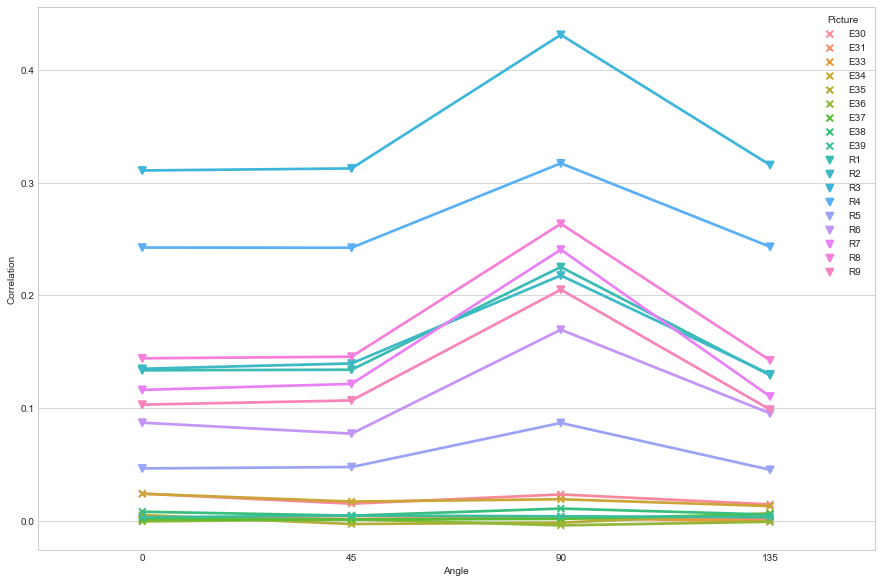

In [62]:
param_list = GLCM_param.columns[2:]
image_list = GLCM_param.Picture.unique()
markers = ["x" if img[0]=="E" else "v" for img in image_list ]
for param in param_list:  
    plt.figure(figsize=(15, 10))
    sns.pointplot(x="Angle", y=param, hue="Picture", data=GLCM_param, markers=markers);
    plt.savefig(param)

## SVM

In [65]:
pic_list = GLCM_param.Picture.unique().tolist()
n = len(pic_list)
X = np.zeros((n, 4*5))
y = np.zeros((n,))
for idx, pic in enumerate(pic_list):
    X[idx, :] = np.array(GLCM_param[GLCM_param.Picture == pic].iloc[:, 2:]).reshape(1, -1)
    if pic[0] == 'R':
        y[idx] = 1

In [97]:
pic_list = GLCM_param.Picture.unique().tolist()
n = len(pic_list)
X = np.zeros((n, 5))
y = np.zeros((n,))
for idx, pic in enumerate(pic_list):
    X[idx, :] = np.array(GLCM_param[(GLCM_param.Picture == pic) & (GLCM_param.Angle == 0)].iloc[:, 2:]).reshape(1, -1)
    if pic[0] == 'R':
        y[idx] = 1

In [98]:
scaler = StandardScaler()
scores = cross_val_score(svm.SVC(C=2, gamma=0.5), scaler.fit_transform(X), y, cv=3, scoring='accuracy')
# scores = cross_val_score(tree.DecisionTreeClassifier(), scaler.fit_transform(X), y, cv=3, scoring='accuracy')
print(scores)

[ 0.72222222  0.94444444  0.875     ]


In [106]:
cnt = 15
scaler = StandardScaler()
train_X = np.row_stack((X[0: cnt, :], X[-cnt:, :]))
train_X = scaler.fit_transform(train_X)
train_y = np.append(y[0: cnt], y[-cnt:])
test_X = X[cnt: -cnt, :]
test_X = scaler.transform(test_X)
test_y = y[cnt: -cnt]

In [107]:
clf = svm.SVC(C=2, gamma=0.5)
# clf = tree.DecisionTreeClassifier()
clf.fit(train_X, train_y)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [108]:
np.count_nonzero((clf.predict(train_X) == train_y).astype(int)) / len(train_y)

0.9333333333333333

In [109]:
np.count_nonzero((clf.predict(test_X) == test_y).astype(int)) / len(test_y)

0.8181818181818182

In [110]:
clf.predict(test_X)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.])

In [111]:
test_y

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

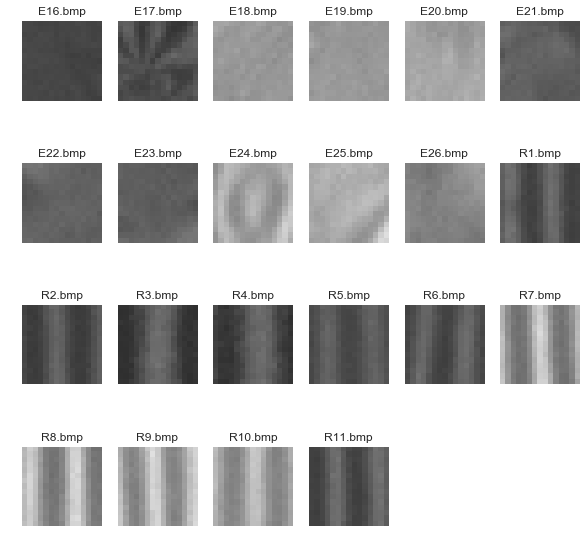

In [112]:
print_img("../img/GLCM_SVM/", img_list=[p+'.bmp' for p in pic_list[cnt: -cnt]])